#### Quantum Walks - Exploring Graphs with Quantum Computing

Quantum Walks are the quantum analogs of classical random walks. 

They have unique properties that can be exploited in various quantum algorithms, particularly for problems in graph theory and search algorithms.

Below is an example of implementing a simple Quantum Walk on a cycle graph using IBM's Qiskit and the Qiskit Aer simulator.

We perform the following steps:

✅ Circuit Initialization: We initialize a quantum circuit with a specified number of qubits, each representing a node in the cycle graph.

✅ Superposition Initialization: We place the walker in a superposition of all nodes using Hadamard gates.

✅ Coin Operator: We define a coin operator (Hadamard gate) to introduce randomness.

✅ Shift Operator: We define a shift operator to move the walker to adjacent nodes in the cycle graph.

✅ Quantum Walk Execution: We apply the coin and shift operators iteratively to simulate the quantum walk.

✅ Measurement: We measure all qubits to observe the walker's position.

✅ Visualization: We visualize the quantum walk circuit and the resulting probability distribution of the walker's position.

Quantum Walks provide a fascinating insight into how quantum mechanics can be applied to explore and solve problems in graph theory and so much more. They form the basis of various quantum algorithms, showcasing the unique potential of quantum computing.

Stay tuned for more quantum computing concepts and implementations!

In [5]:
# Import necessary libraries
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Function to create a quantum walk circuit on a cycle graph
def create_quantum_walk_circuit(num_qubits, num_steps):
    qc = QuantumCircuit(num_qubits)
       # Initialize the walker to be in a superposition of all nodes
    for qubit in range(num_qubits):
        qc.h(qubit)

    # Define the coin and shift operators
    coin = QuantumCircuit(1)
    coin.h(0)

    shift = QuantumCircuit(num_qubits)
    for i in range(num_qubits):
        shift.cx(i, (i + 1) % num_qubits)

    # Apply the coin and shift operators for the specified number of steps
    for _ in range(num_steps):
        for qubit in range(num_qubits):
            qc.append(coin, [qubit])
        qc.append(shift, range(num_qubits))

    # Measure all qubits
    qc.measure_all()

    return qc

In [7]:
# Parameters
num_qubits = 3  # Number of qubits (nodes in the cycle graph)
num_steps = 2  # Number of steps for the quantum walk

In [8]:
# Create the quantum walk circuit
qc = create_quantum_walk_circuit(num_qubits, num_steps)

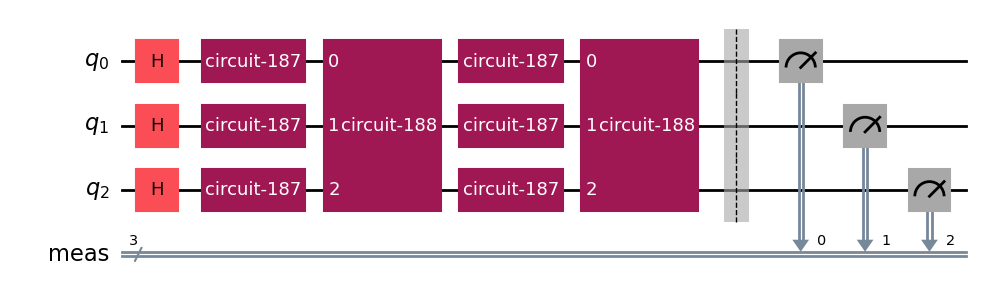

In [9]:
# Visualize the circuit
qc.draw('mpl')
plt.show()

In [10]:
# Initialize the Qiskit Aer simulator
simulator = AerSimulator()

In [11]:
# Transpile the circuit for the simulator
compiled_circuit = transpile(qc, simulator)

In [12]:
# Execute the circuit on the Qiskit Aer simulator
result = simulator.run(compiled_circuit, shots=1000).result()

In [13]:
# Get the measurement results
counts = result.get_counts(compiled_circuit)

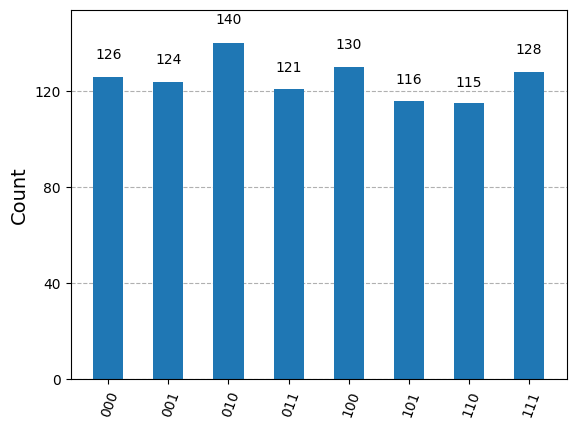

In [14]:
# Plot the results
plot_histogram(counts)
plt.show()